In [356]:
import pandas as pd
import matplotlib.pyplot as mltp
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import sklearn as sk
import seaborn as sea
import re 
from tqdm import tqdm
# from tqdm.notebook import tqdm
# tqdm.pandas()



Latent Dirichlet Allocation (LDA) is a popular algorithm for topic modeling, which is a technique for identifying the underlying themes or topics in a collection of text documents. LDA is a generative probabilistic model that assumes each document is a mixture of a fixed number of topics, and each word in the document is drawn from one of the topics.

The goal of LDA is to infer the topics that generated the words in each document, and to estimate the distribution of words across the topics. This allows LDA to automatically discover the topics present in a collection of documents and to represent each document as a mixture of these topics.

LDA can be used in a variety of applications, such as automatically organizing large collections of documents by topic, identifying the main themes in a corpus of text, or recommending articles similar to a given article. LDA is also often used as a preprocessing step for downstream natural language processing tasks such as text classification or information extraction.

To use LDA, you need to specify the number of topics in the model and fit the model to the documents. The LDA model will then learn the distribution of words across the topics and the distribution of topics for each document. You can then use the model to predict the topics for new documents, or to explore the learned topics and the words associated with each topic.

atent Dirichlet Allocation (LDA) is a generative probabilistic model that assumes each document is a mixture of a fixed number of topics, and each word in the document is drawn from one of the topics. The goal of LDA is to infer the topics that generated the words in each document, and to estimate the distribution of words across the topics.

To do this, LDA uses Bayesian inference, which is a method for estimating the unknown parameters of a probabilistic model based on observed data. In the case of LDA, the model parameters are the topic distributions for each document and the word distributions for each topic.

Here is a high-level overview of how LDA functions:

1. First, LDA assumes that each document is a mixture of a fixed number of topics, and that each word in the document is generated by one of the topics. This means that for each document, there is a probability distribution over the topics, and for each topic, there is a probability distribution over the words.

2. Given a collection of documents, LDA uses Bayesian inference to infer the topic distributions for each document and the word distributions for each topic. This is done by iteratively sampling the topic assignments for each word in each document, and then estimating the topic distributions and word distributions based on the sampled topic assignments.

3. Once the topic distributions and word distributions have been inferred, LDA can be used to predict the topics for new documents. This is done by computing the posterior distribution over the topics given the words in the new document, and then selecting the most likely topics.

4. LDA can also be used to explore the learned topics and the words associated with each topic. This is done by examining the inferred topic distributions and word distributions and identifying the words with the highest probabilities for each topic.

Overall, LDA is a powerful tool for automatically discovering the underlying themes or topics in a collection of text documents. It can be used in a variety of applications, and is often used as a preprocessing step for downstream natural language processing tasks.

Latent Dirichlet Allocation (LDA) ist ein generatives probabilistisches Modell, das davon ausgeht, dass jedes Dokument eine Mischung aus einer festen Anzahl von Themen ist und jedes Wort im Dokument aus einem der Themen stammt. Das Ziel von LDA ist es, die Themen zu ermitteln, die die Wörter in jedem Dokument erzeugt haben, und die Verteilung der Wörter über die Themen zu schätzen.

Um dies zu tun, verwendet LDA Bayes-Schätzung, die eine Methode zur Schätzung der unbekannten Parameter eines probabilistischen Modells anhand beobachteter Daten ist. Im Falle von LDA sind die Modellparameter die Themenverteilungen für jedes Dokument und die Wortverteilungen für jedes Thema.

Hier ist ein Überblick über die Funktionsweise von LDA:

Zunächst geht LDA davon aus, dass jedes Dokument eine Mischung aus einer festen Anzahl von Themen ist und dass jedes Wort im Dokument von einem der Themen erzeugt wird. Das bedeutet, dass es für jedes Dokument eine Wahrscheinlichkeitsverteilung über die Themen gibt und für jedes Thema eine Wahrscheinlichkeitsverteilung über die Wörter.

Angenommen, es gibt eine Sammlung von Dokumenten, verwendet LDA Bayes-Schätzung, um die Themenverteilungen für jedes Dokument und die Wortverteilungen für jedes Thema zu schätzen. Dies wird dadurch erreicht, dass die Themenzuordnungen für jedes Wort in jedem Dokument iterativ gesampelt werden und anschließend die Themenverteilungen und Wortverteilungen anhand der gesampelten Themenzuordnungen geschätzt werden.

Sobald die Themenverteilungen und Wortverteilungen geschätzt wurden, kann LDA verwendet werden, um die Themen für neue Dokumente vorherzusagen. Dies geschieht, indem die posterior Verteilung über die Themen gegebenen die Wörter im neuen Dokument berechnet wird und anschließend die wahrscheinlichsten Themen ausgewählt werden.

LDA kann auch verwendet werden, um die gelernten Themen und die mit jedem Thema verbundenen Wörter zu erkunden. Dies geschieht, indem die geschätzten Themenverte

In [ ]:
df=pd.read_csv('')

In [357]:
def stripping(liste):
    return [i.strip() for i in liste]

In [452]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.reset_index(drop=True)

In [453]:
df.columns

Index(['id', 'date', 'text', 'lang', 'language_2', 'word_tokenize',
       'sent_tokenize', 'count_word', 'count_sent',
       'word_tokenize_num_of_stopwords', 'word_tokenize_without_stopwords',
       'word_tokenize_without_stopwords_port', 'msg_lemmatized', 'cleanLinks',
       'laenge_saetze', 'word_per_sent_mean', 'gender', 'age', 'topic',
       'sign'],
      dtype='object')

In [454]:
print(f'Rows in the df: {len(df.index)}')

Rows in the df: 19500


In [455]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word)
        
         for word in text if word ]
    return lemm_text
df['msg_lemmatized_port']=df['word_tokenize_without_stopwords_port'].apply(lambda x:lemmatizer(x))

- lgrams 
- ngrams 
- sehen wie oft wörter vorkommen 
- sehen welche tokens überall vorkommen in mehreren oder nur in einem drin sind 
- sehen welche dokumente zugeordnet ist und wie  die verteilung ist der uhrsprünglichen topics 
- tendenzen herrausfinden 
- labeling nicht so gut oder topic modelling 
- zu viel topics oder stopwords 
- frequenzen finden -_> idf --> weiviele wörter in den dokumenten vorkommen 
- statistiken der wörter --> basierend auf ngrams 
- edge case nicht beschneiden --> schwellwerte --> explorativ 
- 

In [456]:
df.head()

id            date                                               text  \
0  2970791     25,May,2004  This blog is being posted due to the fact that...   
1  3931851  02,agosto,2004  So I have a big fucking interview tomorrow for...   
2  3481650    07,July,2004  I was reminded just now of the time Ashley and...   
3  4187211  20,August,2004  I was checking up on my cousin Dylan and Fanni...   
4  3686696    24,June,2004  for the NME interview click urlLink part 1 and...   

  lang language_2                                      word_tokenize  \
0   en         en  [This, blog, is, being, posted, due, to, the, ...   
1   en         en  [So, I, have, a, big, fucking, interview, tomo...   
2   en         en  [I, was, reminded, just, now, of, the, time, A...   
3   en         en  [I, was, checking, up, on, my, cousin, Dylan, ...   
4   en         en  [for, the, NME, interview, click, urlLink, par...   

                                       sent_tokenize  count_word  count_sent  \
0  [This blog is being posted due to the fact tha...          83           4   
1  [So I have a big fucking interview tomorrow fo...          88           5   
2  [I was reminded just now of the time Ashley an...         574          32   
3  ["I was checking up on my cousin Dylan and Fan...          84           3   
4  [for the NME interview click urlLink part 1 an...          12           1   

   word_tokenize_num_of_stopwords  ...  \
0                              34  ...   
1                              31  ...   
2                             234  ...   
3                              32  ...   
4                               3  ...   

                word_tokenize_without_stopwords_port  \
0  [thi, blog, post, due, fact, littl, develop, h...   
1  [so, i, big, fuck, interview, tomorrow, new, s...   
2  [i, remind, time, ashley, i, drove, kemah, win...   
3  [i, check, cousin, dylan, fanni, "s", wed, sit...   
4  [nme, interview, click, urllink, part, 1, urll...   

                                      msg_lemmatized  \
0  [This,  blog,  posted,  due,  fact,  little,  ...   
1  [So,  I,  big,  fucking,  interview,  tomorrow...   
2  [I,  reminded,  time,  Ashley,  I,  drove,  Ke...   
3  [I,  checking,  cousin,  Dylan,  Fannie,  "s",...   
4  [NME,  interview,  click,  urlLink,  part,  1,...   

                                          cleanLinks laenge_saetze  \
0  This blog is being posted due to the fact that...             4   
1  So I have a big fucking interview tomorrow for...             5   
2  I was reminded just now of the time Ashley and...            32   
3  I was checking up on my cousin Dylan and Fanni...             3   
4  for the NME interview click urlLink part 1 and...             1   

   word_per_sent_mean  gender age    topic         sign  \
0               20.75    male  14  Student  Sagittarius   
1               17.60    male  15  Student       Pisces   
2               17.94  female  17  Student       Gemini   
3               28.00  female  23  Student       Taurus   
4               12.00  female  23  Student     Aquarius   

                                 msg_lemmatized_port  
0  [thi, blog, post, due, fact, littl, develop, h...  
1  [so, i, big, fuck, interview, tomorrow, new, s...  
2  [i, remind, time, ashley, i, drove, kemah, win...  
3  [i, check, cousin, dylan, fanni, "s", wed, sit...  
4  [nme, interview, click, urllink, part, 1, urll...  

[5 rows x 21 columns]

In [457]:
from wordcloud import WordCloud

In [458]:
element=[',','.','!','"',')','(']

x = [word  for word in  df['msg_lemmatized_port'][0] if word not in element]
x

['thi',
 'blog',
 'post',
 'due',
 'fact',
 'littl',
 'develop',
 'happen',
 'recent',
 'regard',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'if',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individu',
 'must',
 'somehow',
 'organ',
 'someth',
 'soon',
 'also',
 'consid',
 'last',
 'day',
 'school',
 'i',
 'think',
 'everyon',
 'particip',
 'success',
 'we',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school']

In [459]:
def point_red(liste):
    element=[',','.','!','"',')','(']
    return [word  for word in  df['msg_lemmatized'][0] if word not in element]
df['msg_lemmatized_without_point']=df['msg_lemmatized_port'].apply(lambda x:point_red(x))


In [460]:
text = list(df.msg_lemmatized_without_point.values)
flat_list = [item for sublist in text for item in sublist]
flat_list

['This',
 ' blog',
 ' posted',
 ' due',
 ' fact',
 ' little',
 ' development',
 ' happened',
 ' recently',
 ' regarding',
 ' last',
 ' day',
 ' school',
 ' uniform',
 ' swap',
 ' .',
 ' If',
 ' plan',
 ' switch',
 ' uniform',
 ' certain',
 ' individual',
 ' must',
 ' somehow',
 ' organize',
 ' something',
 ' soon',
 ' .',
 ' Also',
 ' consider',
 ' last',
 ' day',
 ' school',
 ' I',
 ' think',
 ' everyone',
 ' participates',
 ' success',
 ' .',
 ' We',
 ' must',
 ' plan',
 ' soon',
 ' pray',
 ' drop-the-dress-code-day',
 ' last',
 ' day',
 ' school',
 ' .',
 'This',
 ' blog',
 ' posted',
 ' due',
 ' fact',
 ' little',
 ' development',
 ' happened',
 ' recently',
 ' regarding',
 ' last',
 ' day',
 ' school',
 ' uniform',
 ' swap',
 ' .',
 ' If',
 ' plan',
 ' switch',
 ' uniform',
 ' certain',
 ' individual',
 ' must',
 ' somehow',
 ' organize',
 ' something',
 ' soon',
 ' .',
 ' Also',
 ' consider',
 ' last',
 ' day',
 ' school',
 ' I',
 ' think',
 ' everyone',
 ' participates',
 ' succ

In [461]:
long_string = ','.join(flat_list)

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

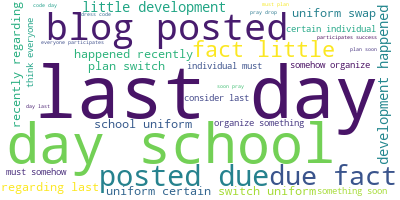

In [462]:
text = list(df.msg_lemmatized.values)
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [463]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [465]:
from nltk import ngrams
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
sent_2=df['text'][0]
get_ngrams(sent_2,6)

['This blog is being posted due',
 'blog is being posted due to',
 'is being posted due to the',
 'being posted due to the fact',
 'posted due to the fact that',
 'due to the fact that little',
 'to the fact that little development',
 'the fact that little development has',
 'fact that little development has happened',
 'that little development has happened recently',
 'little development has happened recently regarding',
 'development has happened recently regarding the',
 'has happened recently regarding the last',
 'happened recently regarding the last day',
 'recently regarding the last day of',
 'regarding the last day of school',
 'the last day of school uniform',
 'last day of school uniform swap',
 'day of school uniform swap .',
 'of school uniform swap . If',
 'school uniform swap . If we',
 'uniform swap . If we all',
 'swap . If we all plan',
 '. If we all plan to',
 'If we all plan to switch',
 'we all plan to switch uniforms',
 'all plan to switch uniforms with',
 'plan t

In [466]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections


import nltk
from nltk.corpus import stopwords
import re


import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [467]:
all_words_nsw = list(itertools.chain(*df['msg_lemmatized_without_point']))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[(' .', 78000),
 (' last', 58500),
 (' day', 58500),
 (' school', 58500),
 (' uniform', 39000),
 (' plan', 39000),
 (' must', 39000),
 (' soon', 39000),
 ('This', 19500),
 (' blog', 19500),
 (' posted', 19500),
 (' due', 19500),
 (' fact', 19500),
 (' little', 19500),
 (' development', 19500)]

In [468]:
len(counts_nsw)

36

In [469]:
clean_tweets_no_urls = pd.DataFrame(counts_nsw,
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

Empty DataFrame
Columns: [words, count]
Index: []

In [470]:
from ast import literal_eval
def create_word_dict(data, without_stopwords=True, with_stopwords=False):

    if without_stopwords:
        word_dict_without_stopwords = {}
        
    if with_stopwords:
        word_dict_with_stopwords = {}

    stopword_list = stopwords.words('english')
    for i in tqdm(range(len(data))):
        if without_stopwords:
            for word in literal_eval(str(data["word_tokenize_without_stopwords"][i])):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I"] and word not in stopword_list:
                    if word in word_dict_without_stopwords.keys():
                        word_dict_without_stopwords[word] += 1
                    else:
                        word_dict_without_stopwords[word] = 1

        if with_stopwords:
            for word in literal_eval(str(data["word_tokenize"][i])):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I"]:
                    if word in word_dict_with_stopwords.keys():
                        word_dict_with_stopwords[word] += 1
                    else:
                        word_dict_with_stopwords[word] = 1

    if without_stopwords and with_stopwords:
        return word_dict_without_stopwords, word_dict_with_stopwords
    elif without_stopwords:
        return word_dict_without_stopwords
    elif with_stopwords:
        return word_dict_with_stopwords
    else:
        print("Nothing to return selected")
        return 0

In [471]:
words_without_stopwords, words_with_stopwords = create_word_dict(df, True, True)

100%|██████████| 19500/19500 [00:12<00:00, 1589.78it/s]


UnboundLocalError: local variable 'fig' referenced before assignment

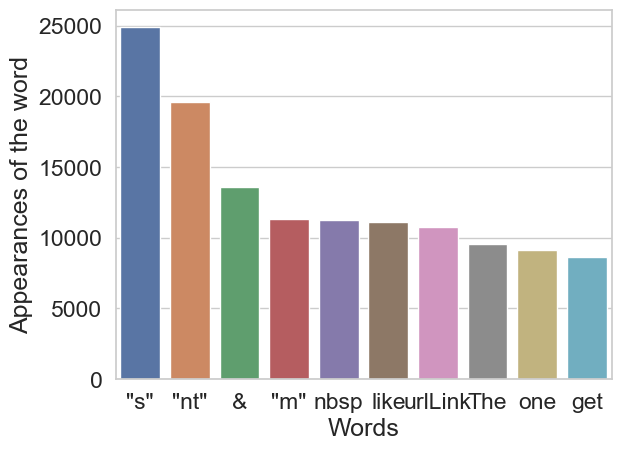

In [133]:
import seaborn as sb
def visualize_specific_words(dictionary, limit=10, save_fig=True, save_name="standard_save_name"):
    data_as_df = pd.DataFrame(data={"word": dictionary.keys(), "number": dictionary.values()})
    sorted_df = data_as_df.sort_values(by="number", ascending=False)

    figure = sb.barplot(data=sorted_df[:limit], x="word", y="number", palette="deep")
    figure.set_xlabel("Words")
    figure.set_ylabel("Appearances of the word")

    if save_fig:
        fig = figure.get_figure()
        fig.savefig(str(save_name + ".jpg"))

    return fig.get_figure()
figure_1 = visualize_specific_words(words_without_stopwords, save_fig=False)

In [134]:
df.msg_lemmatized_without_point.values.tolist()

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school'],
 ['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'so

In [73]:
liste=[]
for topic in  topics:

    text = list(df[df['topic']==topic].msg_lemmatized_without_point.values)
    flat_list = [item for sublist in text for item in sublist]
    liste.append(flat_list)
liste

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school',
  'This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soo

In [29]:
import gensim.corpora as corpora

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [72]:
df['msg_lemmatized_without_point'].values.tolist()

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school'],
 ['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'so

In [92]:
data_words=df.msg_lemmatized_without_point.values.tolist()

In [93]:
data_words=df.msg_lemmatized_without_point.values.tolist()
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2)]


In [80]:
import gensim
from gensim.utils import simple_preprocess

In [99]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.072*"school" + 0.068*"day" + 0.063*"last" + 0.045*"must" + 0.045*"plan" + '
  '0.043*"soon" + 0.043*"uniform" + 0.025*"everyone" + 0.025*"blog" + '
  '0.024*"organize"'),
 (1,
  '0.071*"day" + 0.066*"school" + 0.063*"last" + 0.046*"uniform" + '
  '0.045*"plan" + 0.042*"soon" + 0.038*"must" + 0.028*"little" + '
  '0.028*"everyone" + 0.026*"individual"'),
 (2,
  '0.058*"school" + 0.052*"day" + 0.048*"must" + 0.047*"plan" + '
  '0.041*"uniform" + 0.039*"last" + 0.036*"soon" + 0.030*"regarding" + '
  '0.029*"everyone" + 0.028*"pray"'),
 (3,
  '0.073*"school" + 0.060*"day" + 0.052*"soon" + 0.049*"last" + '
  '0.042*"uniform" + 0.040*"must" + 0.039*"plan" + 0.027*"certain" + '
  '0.026*"blog" + 0.026*"If"'),
 (4,
  '0.075*"last" + 0.065*"day" + 0.058*"school" + 0.047*"plan" + 0.044*"soon" + '
  '0.043*"uniform" + 0.042*"must" + 0.026*"recently" + 0.025*"due" + '
  '0.025*"swap"'),
 (5,
  '0.069*"day" + 0.063*"last" + 0.056*"school" + 0.049*"uniform" + '
  '0.047*"soon" + 0.045*"pla

In [85]:
import pyLDAvis

voirgehen:
- spacy pipeline machen 
- basierend auf nomen oder so die als grundlage für lda nehmen --> sehen wie verteillungen von den organisationen etc sind 


In [47]:
df["msg_lemmatized_without_point"].values

array([list(['This', ' blog', ' posted', ' due', ' fact', ' little', ' development', ' happened', ' recently', ' regarding', ' last', ' day', ' school', ' uniform', ' swap', ' .', ' If', ' plan', ' switch', ' uniform', ' certain', ' individual', ' must', ' somehow', ' organize', ' something', ' soon', ' .', ' Also', ' consider', ' last', ' day', ' school', ' I', ' think', ' everyone', ' participates', ' success', ' .', ' We', ' must', ' plan', ' soon', ' pray', ' drop-the-dress-code-day', ' last', ' day', ' school', ' .']),
       list(['This', ' blog', ' posted', ' due', ' fact', ' little', ' development', ' happened', ' recently', ' regarding', ' last', ' day', ' school', ' uniform', ' swap', ' .', ' If', ' plan', ' switch', ' uniform', ' certain', ' individual', ' must', ' somehow', ' organize', ' something', ' soon', ' .', ' Also', ' consider', ' last', ' day', ' school', ' I', ' think', ' everyone', ' participates', ' success', ' .', ' We', ' must', ' plan', ' soon', ' pray', ' dr

In [48]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 5

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics)
lda.fit(df["msg_lemmatized_without_point"])

# Print the topics and their corresponding weights for each set of tokens
for index, row in df.iterrows():
    print("Document #%d" % index)
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([row["tokens_array"][i] for i in topic.argsort()[:-num_topics - 1:-1]])
        print(message)

ValueError: setting an array element with a sequence.

In [51]:
import spacy
dataframe["tokens_sequence"].tolist()

[['apple', 'banana', 'orange'],
 ['dog', 'cat', 'mouse'],
 ['car', 'truck', 'bus']]

In [52]:

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [62]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(df["msg_lemmatized_without_point"].tolist(), allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])

['blog post fact development happen regard day school plan switch uniform must organize consider day school think participate success must plan pray drop dress code day day school', 'blog post fact development happen regard day school plan switch uniform must organize consider day school think participate success must plan pray drop dress code day day school']


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}'  
# num chars > 3
                             # max_features=50000,             
# max number of uniq words    
)


In [64]:
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [65]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [68]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
 evaluate_every=-1, learning_decay=0.7,
 learning_method='online', learning_offset=10.0,
 max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
 n_components=10, n_jobs=-1,  perp_tol=0.1,
 random_state=100, topic_word_prior=None,
 total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100)

In [70]:
from pprint import pprint

In [71]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -1818373.5165940826
Perplexity:  36.10876146265444
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [50]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation

# Create example dataframe
data = {
    "tokens_sequence": [
        ["apple", "banana", "orange"],
        ["dog", "cat", "mouse"],
        ["car", "truck", "bus"]
    ]
}
dataframe = pd.DataFrame(data)
data_vectorized = vectorizer.fit_transform(data_lemmatized)
# Define the number of topics
num_topics = 3

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics)
lda.fit(dataframe["tokens_sequence"].tolist())

# Print the topics and their corresponding weights for each set of tokens
for index, row in dataframe.iterrows():
    print("Document #%d" % index)
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([row["tokens_sequence"][i] for i in topic.argsort()[:-num_topics - 1:-1]])
        print(message)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [147]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 MB 4.8 MB/s eta 0:00:0000:0100:03
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_lg: filename=en_core_web_lg-2.3.1-py3-none-any.whl size=782936104 sha256=91cf7ad53fff25d4018b0a9657ce05237761b48c3bdbd828614b83fdee4caf49
  Stored in directory: /Users/niclascramer/Library/Caches/pip/wheels/8b/bb/bb/bdc918f4b37d930a1be9ed876e7b2c2ee518a34803d78a248e
Successfully built en_core_web_lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [11]:
import spacy

nlp_sm = spacy.load("en_core_web_sm")
nlp_lg = spacy.load('en_core_web_lg')

def create_word_counts_by_pos(raw_text, list_of_pos, word_count_dict_input = None):
    """
    takes a raw text file
    tokenizes and lemmatizes it
    limits inspection to list_of_pos types of words
    counts the individual lemmas
    returns a dictionary, keys are pos's in list_of_pos
    values are dictinaries with word counts
    """

    doc = nlp_lg(raw_text)

    if word_count_dict_input is None: 
        word_count_dict = {}
        for part_of_speech in list_of_pos:
            word_count_dict[part_of_speech] = {}
    else:
        word_count_dict = word_count_dict_input

    for token in doc: 
        part_of_speech = token.pos_

        if part_of_speech in list_of_pos and token.is_stop == False:
            word_lemma = token.lemma_
            current_count = word_count_dict[part_of_speech].get(word_lemma, 0)
            current_count += 1
            word_count_dict[part_of_speech][word_lemma] = current_count

    return word_count_dict

def filter_word_count_dict_to_frequent(word_count_dict, threshold):
    """
    Loops through word_count_dict, only keeps items where 
    value is higher than a certain threshold
    """
    frequent_word_count_dict = {}

    list_of_pos = word_count_dict.keys()

    for part_of_speech in list_of_pos:
        frequent_word_count_dict[part_of_speech] = {}
        for key in word_count_dict[part_of_speech]:
            if word_count_dict[part_of_speech][key] > threshold:
                frequent_word_count_dict[part_of_speech][key] = \
                word_count_dict[part_of_speech][key]
                
    return frequent_word_count_dict

def collect_most_frequent_words(word_count_dict, number_to_collect):
    """
    word_count_dict is assumed to be in a format where keys are part-of-speech, 
    values are counts
    number_of_collect: we will collect this amount from each group
    if there is a tie: the one that appeared first
    """

    list_of_pos = word_count_dict.keys()
    most_frequent_words = {}

    for part_of_speech in list_of_pos:
        most_frequent_words[part_of_speech] = \
        sorted(word_count_dict[part_of_speech].items(), \
            key=lambda x: x[1], reverse = True)[:number_to_collect] 
        
    return most_frequent_words

In [148]:
list_of_pos = ['NOUN', 'PROPN', 'ADJ', 'VERB']

In [149]:
df['text'][0]

'This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap. If we all plan to switch uniforms with a certain individual we must somehow organize something soon. Also what do we consider the last day of school I think if everyone participates this will be a success. We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.'

In [159]:
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
sent_2=df['text'][0]
get_ngrams(sent_2,4)

['This blog is being',
 'blog is being posted',
 'is being posted due',
 'being posted due to',
 'posted due to the',
 'due to the fact',
 'to the fact that',
 'the fact that little',
 'fact that little development',
 'that little development has',
 'little development has happened',
 'development has happened recently',
 'has happened recently regarding',
 'happened recently regarding the',
 'recently regarding the last',
 'regarding the last day',
 'the last day of',
 'last day of school',
 'day of school uniform',
 'of school uniform swap',
 'school uniform swap .',
 'uniform swap . If',
 'swap . If we',
 '. If we all',
 'If we all plan',
 'we all plan to',
 'all plan to switch',
 'plan to switch uniforms',
 'to switch uniforms with',
 'switch uniforms with a',
 'uniforms with a certain',
 'with a certain individual',
 'a certain individual we',
 'certain individual we must',
 'individual we must somehow',
 'we must somehow organize',
 'must somehow organize something',
 'somehow or

In [9]:
import random
import string
import nltk
from nltk import ngrams as get_ngrams


start_of_seq_token = "<START>"


class NgramModel(object):
    def __init__(self, n):
        self.n = n

        # dictionary that keeps list of candidate words given context
        self.context = {}
        self.ngram_counter_without_pre = {}

        # keeps track of how many times ngram has appeared in the text before
        self.ngram_counter = {}
        self.unique_count={}
        self.listen_append=[]


    def update(self, sentence: str,liste:list):
        """
        Updates the language model with an additional sentence (string)
        :param sentence: input text
        """
        liste=liste
        n = self.n
        sentence = (n-1) * [start_of_seq_token] + [w for w in nltk.word_tokenize(sentence) if w not in string.punctuation]
        ngrams = get_ngrams(sentence, n)
        for ngram in ngrams:
            #print(ngram)
            prev_words, target_word = ngram[:-1], ngram[-1]
            if (prev_words, target_word) in self.ngram_counter:
                self.ngram_counter[(prev_words, target_word)] += 1.0
            else:
                self.ngram_counter[(prev_words, target_word)] = 1.0


            if target_word in self.unique_count and target_word not in liste:
                liste.append(target_word)
                self.unique_count[target_word] += 1.0
                #print(1)

            elif target_word in self.unique_count and target_word  in liste:
                #print(2)
                pass
                
            else:
                #print(3)
                self.unique_count[target_word] = 1.0

            if target_word in self.ngram_counter_without_pre:
                
                self.ngram_counter_without_pre[target_word] += 1.0
            else:
                self.ngram_counter_without_pre[target_word] = 1.0

            if prev_words in self.context:
                if target_word not in self.context[prev_words]:
                    self.context[prev_words].append(target_word)
                else:
                    pass
            else:
                self.context[prev_words] = [target_word]
        return liste

    # def clac(self, sentence: str, liste:list):
    #     """
    #     Updates the language model with an additional sentence (string)
    #     :param sentence: input text
    #     """
    #     n = self.n
    #     listen_append = self.listen_append
    #     listen_append = liste + listen_append
    #     #print()
    #     sentence = (n-1) * [start_of_seq_token] + [w for w in nltk.word_tokenize(sentence) if w not in string.punctuation]
    #     ngrams = get_ngrams(sentence, n)
    #     #print(ngrams)
    #     #print(listen_append)
    #     for ngram in ngrams:
    #         #print(ngram)
    #         prev_words, target_word = ngram[:-1], ngram[-1]
    #         #print(target_word)
    #         if target_word in self.unique_count and target_word not in listen_append:
    #             listen_append.append(target_word)
    #             self.unique_count[target_word] += 1.0
    #             #print(1)

    #         elif target_word in self.unique_count and target_word  in listen_append:
    #             #print(2)
    #             pass
                
    #         else:
    #             #print(3)
    #             self.unique_count[target_word] = 1.0
    #     #Sprint(listen_append)
    #     return listen_append
        
    def prob(self, context, token):
        """
        Calculates probability of a candidate token to be generated given a context
        :return: conditional probability
        """
        try:
            count_of_token = self.ngram_counter[(context, token)]
            count_of_context = float(len(self.context[context]))
            result = count_of_token / count_of_context

        except KeyError:
            result = 0.0
            
        return result
    
    def random_token(self, context):
        """
        Given a context, selects the next word to append in a sequence
        :param context:
        :return:
        """
        r = random.random() / 50
        map_to_probs = {}
        token_of_interest = self.context[context]
        for token in token_of_interest:
            map_to_probs[token] = self.prob(context, token)

        summ = 0
        for token in sorted(map_to_probs):
            summ += map_to_probs[token]
            if summ > r:
                return token
        
        return next(sorted(map_to_probs))

    def generate_text(self, token_count: int):
        """
        :param token_count: number of words to be produced
        :return: generated text
        """
        n = self.n
        context_queue = (n - 1) * [start_of_seq_token]
        result = []
        for _ in range(token_count):
            obj = self.random_token(tuple(context_queue))
            result.append(obj)
            if n > 1:
                context_queue.pop(0)
                if obj == '.':
                    context_queue = (n - 1) * [start_of_seq_token]
                else:
                    context_queue.append(obj)
        return ' '.join(result)

In [ ]:
import nltk
import unicodedata
import string

all_characters = string.printable
n_characters = len(all_characters)

# Turn a Unicode string to plain ASCII, see https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

with open('tinyshakespeare.txt', 'r', encoding="utf-8") as f:
    texts = unicodeToAscii(f.read())

sentences = [sent for sent in nltk.sent_tokenize(texts) if sent]

In [163]:
import string
all_characters = string.printable
n_characters = len(all_characters)
n_characters

100

In [298]:
sentences = [sent for sent in nltk.sent_tokenize(df['text'][0]) if sent]
sentences
a=[w for w in nltk.word_tokenize(sentence).unique() if w not in string.punctuation]

['This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap.',
 'If we all plan to switch uniforms with a certain individual we must somehow organize something soon.',
 'Also what do we consider the last day of school I think if everyone participates this will be a success.',
 'We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.']

In [11]:
%%time
model = NgramModel(n=2)
for x in tqdm(range(len(df.index))):
#for x in tqdm(range(3)):  
    sentences = [sent for sent in nltk.sent_tokenize(df['text'][x]) if sent]
    
    liste=[]
    for sent in sentences:
        #num=1
        #print(sent)
        liste=model.update(sent,liste)
        #liste=model.clac(sent,liste)
    #print(liste)

    
print(len(model.unique_count))

  0%|          | 0/19500 [00:00<?, ?it/s]

121338
CPU times: user 58.9 s, sys: 540 ms, total: 59.4 s
Wall time: 59.1 s


In [295]:
words_in_texts=pd.DataFrame(model.ngram_counter_without_pre,index=[0]).transpose().reset_index().rename(columns={'index':'word',0:'num'})
words_in_texts.head()

word      num
0    This   3141.0
1    blog   2000.0
2      is  33051.0
3   being   2866.0
4  posted    339.0

In [276]:
words_in_texts.to_csv('data/words_in_text.csv')


In [3]:
words_in_texts=pd.read_csv('data/words_in_text.csv')

words_in_texts=words_in_texts.loc[:, ~words_in_texts.columns.str.contains('^Unnamed')]
words_in_texts.sort_values(by= 'num',ascending=False).head()

word       num
7   the  108773.0
41    I  100310.0
6    to   88167.0
51  and   72508.0
29    a   63895.0

In [ ]:
count_overview=pd.DataFrame(model.unique_count,index=[0]).transpose().reset_index().rename(columns={'index':'word',0:'num'})
count_overview.to_csv('data/count_overview.csv')



word      num
7   the  15931.0
6    to  15476.0
29    a  14476.0
51  and  14383.0
18   of  13460.0

In [5]:
count_overview=pd.read_csv('data/count_overview.csv')
count_overview=count_overview.loc[:, ~count_overview.columns.str.contains('^Unnamed')]
count_overview.sort_values(by= 'num',ascending=False).head()


word      num
7   the  15931.0
6    to  15476.0
29    a  14476.0
51  and  14383.0
18   of  13460.0

In [94]:
count_overview.sort_values(by= 'num',ascending=False).head(20)

word      num
7     the  15931.0
6      to  15476.0
29      a  14476.0
51    and  14383.0
18     of  13460.0
41      I  13141.0
79     in  12230.0
146    it  11858.0
2      is  11817.0
9    that  11724.0
63    for  11060.0
64     my  10172.0
56     on  10096.0
75     's   9743.0
58   have   9475.0
28   with   8955.0
46   this   8951.0
48     be   8830.0
93    you   8531.0
130   but   8488.0

In [7]:
count_ordnung=count_overview.sort_values(by= 'num',ascending=False)

In [102]:
words_that_are_often=count_ordnung[count_ordnung['num']>6000]
words_that_are_often

word      num
7      the  15931.0
6       to  15476.0
29       a  14476.0
51     and  14383.0
18      of  13460.0
41       I  13141.0
79      in  12230.0
146     it  11858.0
2       is  11817.0
9     that  11724.0
63     for  11060.0
64      my  10172.0
56      on  10096.0
75      's   9743.0
58    have   9475.0
28    with   8955.0
46    this   8951.0
48      be   8830.0
93     you   8531.0
130    but   8488.0
71     n't   8482.0
113    was   8207.0
78      me   8146.0
161     at   7948.0
149     so   7516.0
54     not   7503.0
39      do   7452.0
24     all   7304.0
148    are   6798.0
256    out   6723.0
115   just   6653.0
467    ...   6385.0
90    like   6367.0
336     up   6323.0
628  about   6247.0
101   from   6137.0
135     as   6007.0

In [101]:
words_in_texts=words_in_texts.sort_values(by= 'num',ascending=False)


word       num
7               the  108773.0
41                I  100310.0
6                to   88167.0
51              and   72508.0
29                a   63895.0
...             ...       ...
113738       'astro       1.0
97168     braindead       1.0
113737     miricale       1.0
113736  paracetamol       1.0
121337          s0o       1.0

[121338 rows x 2 columns]

In [95]:
words_in_texts[words_in_texts['num']>7000]

word       num
7      the  108773.0
41       I  100310.0
6       to   88167.0
51     and   72508.0
29       a   63895.0
..     ...       ...
72    know    7559.0
43      if    7316.0
181     by    7199.0
327  would    7052.0
293     an    7024.0

[61 rows x 2 columns]

In [514]:
import spacy

nlp = spacy.load("en_core_web_sm")
text_list=[]
lemma_list=[]
pos_list=[]
tag_list=[]
dep_list=[]
shape_list=[]
alpha_list=[]
stop_list=[]

for text in tqdm(df.text.tolist()):
    doc = nlp(text)
    text_list_word=[]
    lemma_list_word=[]
    pos_list_word=[]
    tag_list_word=[]
    dep_list_word=[]
    shape_list_word=[]
    alpha_list_word=[]
    stop_list_word=[]
    for token in doc:
        text_list_word.append(token.text)
        lemma_list_word.append(token.lemma_)
        pos_list_word.append(token.pos_)
        tag_list_word.append(token.tag_)
        dep_list_word.append(token.dep_)
        shape_list_word.append(token.shape_)
        alpha_list_word.append(token.is_alpha)
        stop_list_word.append(token.is_stop)
    text_list.append(text_list_word)
    lemma_list.append(lemma_list_word)
    pos_list.append(pos_list_word)
    tag_list.append(tag_list_word)
    dep_list.append(dep_list_word)
    shape_list.append(shape_list_word)
    alpha_list.append(alpha_list_word)
    stop_list.append(stop_list_word)
    #print(text_list)
d = {'text':df.text.tolist(),'text_list': text_list, 'lemma_list': lemma_list,'pos_list': pos_list, 'tag_list': tag_list,'dep_list': dep_list, 'shape_list': shape_list,'alpha_list': alpha_list, 'stop_list': stop_list,'gender':df.gender.tolist(),'sign':df.sign.tolist(),'topic':df.topic.tolist()}
df_text_spacy=pd.DataFrame(data=d)
    


100%|██████████| 19500/19500 [07:55<00:00, 40.97it/s]


In [516]:
from nltk.corpus import stopwords
def stopwords_count_and_removal(data, col, language="english"):

    stoplist = stopwords.words(language)

    number_of_stopwords = []
    text_without_stopwords = []

    col_name_number_of_stopwords = col + "_num_of_stopwords"
    col_name_without_stopwords = col + "_without_stopwords"

    for i in tqdm(range(len(data))):
        no_of_words = 0
        without_stopwords = []
        for word in data[col][i]:
            if word in stoplist:
                no_of_words += 1
            else:
                without_stopwords.append(word)
        
        text_without_stopwords.append(without_stopwords)
        number_of_stopwords.append(no_of_words)

    data[col_name_number_of_stopwords] = number_of_stopwords
    data[col_name_without_stopwords] = text_without_stopwords


    return data

In [517]:
df_text_spacy=stopwords_count_and_removal(df_text_spacy,'lemma_list')

100%|██████████| 19500/19500 [00:04<00:00, 4014.16it/s]


In [519]:
# define the first list
list2 = words_that_are_often.word.tolist()+['-pron-']
set2 = set(list2)
gesamt_liste=[]
for liste in tqdm(df_text_spacy.lemma_list_without_stopwords.tolist()):

    set1 = set(liste)
    common = set1.intersection(set2)
    common_list = list(common)
    list1 = [x for x in liste if x not in common_list]
    gesamt_liste.append(list1)
df_text_spacy['removes_words']=gesamt_liste

100%|██████████| 19500/19500 [00:00<00:00, 49122.33it/s]


In [521]:

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    text_out_list=[]
    for sent in tqdm(texts):
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
        text_out_list.append([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags])
    return texts_out,text_out_list

In [522]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized,text_out_list = lemmatization(df_text_spacy["removes_words"].tolist(), allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])
print(text_out_list[:2])

100%|██████████| 19500/19500 [01:31<00:00, 213.16it/s]

['fact development happen regard day school uniform swap plan switch uniform must organize consider day school think participate success must plan pray drop dress code day day school', 'interview tomorrow school scare talk people know include girl go put spot question ask apply view use library help']
[['fact', 'development', 'happen', 'regard', 'day', 'school', 'uniform', 'swap', 'plan', 'switch', 'uniform', 'must', 'organize', 'consider', 'day', 'school', 'think', 'participate', 'success', 'must', 'plan', 'pray', 'drop', 'dress', 'code', 'day', 'day', 'school'], ['interview', 'tomorrow', 'school', 'scare', 'talk', 'people', 'know', 'include', 'girl', 'go', 'put', 'spot', 'question', 'ask', 'apply', 'view', 'use', 'library', 'help']]


In [523]:
df_text_spacy['data_lemmatized']=data_lemmatized
df_text_spacy['text_out_list']=text_out_list

In [524]:
data_lemmatized_noun,text_out_list_noun = lemmatization(df_text_spacy["removes_words"].tolist(), allowed_postags=['NOUN']) #select noun and verb
df_text_spacy['data_lemmatized_noun']=data_lemmatized_noun
df_text_spacy['text_out_list_noun']=text_out_list_noun

100%|██████████| 19500/19500 [01:24<00:00, 229.79it/s]


In [525]:
df_text_spacy.head()

text  \
0  This blog is being posted due to the fact that...   
1  So I have a big fucking interview tomorrow for...   
2  I was reminded just now of the time Ashley and...   
3  I was checking up on my cousin Dylan and Fanni...   
4  for the NME interview click urlLink part 1 and...   

                                           text_list  \
0  [This, blog, is, being, posted, due, to, the, ...   
1  [So, I, have, a, big, fucking, interview, tomo...   
2  [I, was, reminded, just, now, of, the, time, A...   
3  [I, was, checking, up, on, my, cousin, Dylan, ...   
4  [for, the, NME, interview, click, urlLink, par...   

                                          lemma_list  \
0  [this, blog, be, be, post, due, to, the, fact,...   
1  [so, -PRON-, have, a, big, fucking, interview,...   
2  [-PRON-, be, remind, just, now, of, the, time,...   
3  [-PRON-, be, check, up, on, -PRON-, cousin, Dy...   
4  [for, the, NME, interview, click, urllink, par...   

                                            pos_list  \
0  [DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...   
1  [CCONJ, PRON, AUX, DET, ADJ, ADJ, NOUN, NOUN, ...   
2  [PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...   
3  [PRON, AUX, VERB, ADP, ADP, DET, NOUN, PROPN, ...   
4  [ADP, DET, PROPN, NOUN, VERB, ADJ, NOUN, NUM, ...   

                                            tag_list  \
0  [DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...   
1  [CC, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...   
2  [PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...   
3  [PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...   
4  [IN, DT, NNP, NN, VB, JJ, NN, CD, CC, VBP, NN,...   

                                            dep_list  \
0  [det, nsubjpass, aux, auxpass, ROOT, prep, pco...   
1  [advmod, nsubj, ROOT, det, amod, amod, dobj, n...   
2  [nsubjpass, auxpass, ROOT, advmod, advmod, pre...   
3  [nsubj, aux, ROOT, prt, prep, poss, pobj, poss...   
4  [prep, det, compound, nsubj, ROOT, punct, npad...   

                                          shape_list  \
0  [Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...   
1  [Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...   
2  [X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...   
3  [X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...   
4  [xxx, xxx, XXX, xxxx, xxxx, xxxXxxx, xxxx, d, ...   

                                          alpha_list  \
0  [True, True, True, True, True, True, True, Tru...   
1  [True, True, True, True, True, True, True, Tru...   
2  [True, True, True, True, True, True, True, Tru...   
3  [True, True, True, True, True, True, True, Tru...   
4  [True, True, True, True, True, True, True, Fal...   

                                           stop_list  gender         sign  \
0  [True, False, True, True, False, True, True, T...    male  Sagittarius   
1  [True, True, True, True, False, False, False, ...    male       Pisces   
2  [True, True, False, True, True, True, True, Fa...  female       Gemini   
3  [True, True, False, True, True, True, False, F...  female       Taurus   
4  [True, True, False, False, False, False, True,...  female     Aquarius   

     topic  lemma_list_num_of_stopwords  \
0  Student                           34   
1  Student                           32   
2  Student                          222   
3  Student                           29   
4  Student                            3   

                        lemma_list_without_stopwords  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   
2  [-PRON-, remind, time, Ashley, -PRON-, drive, ...   
3  [-PRON-, check, -PRON-, cousin, Dylan, Fannie,...   
4  [NME, interview, click, urllink, part, 1, urll...   

                                       removes_words  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   
2  [-PRON-, remind, time, Ashley, -PRON-, drive, ...   
3  [-PRON-, check, -PRON-, cousin, Dylan, Fannie,...   
4  [NME, inte

In [526]:
df_text_spacy.to_csv('data/df_text_spacy.csv')

In [418]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def port(liste):
    return [porter_stemmer.stem(x) for x in liste]

tqdm.pandas()
df_text_spacy['word_tokenize_without_stopwords_port']=df_text_spacy['text_out_list'].progress_apply(port)

100%|██████████| 19500/19500 [00:10<00:00, 1784.69it/s]


In [419]:
df_text_spacy.head()

text  \
0  This blog is being posted due to the fact that...   
1  So I have a big fucking interview tomorrow for...   
2  I was reminded just now of the time Ashley and...   
3  I was checking up on my cousin Dylan and Fanni...   
4  for the NME interview click urlLink part 1 and...   

                                           text_list  \
0  [This, blog, is, being, posted, due, to, the, ...   
1  [So, I, have, a, big, fucking, interview, tomo...   
2  [I, was, reminded, just, now, of, the, time, A...   
3  [I, was, checking, up, on, my, cousin, Dylan, ...   
4  [for, the, NME, interview, click, urlLink, par...   

                                          lemma_list  \
0  [this, blog, be, be, post, due, to, the, fact,...   
1  [so, -PRON-, have, a, big, fucking, interview,...   
2  [-PRON-, be, remind, just, now, of, the, time,...   
3  [-PRON-, be, check, up, on, -PRON-, cousin, Dy...   
4  [for, the, NME, interview, click, urllink, par...   

                                            pos_list  \
0  [DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...   
1  [CCONJ, PRON, AUX, DET, ADJ, ADJ, NOUN, NOUN, ...   
2  [PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...   
3  [PRON, AUX, VERB, ADP, ADP, DET, NOUN, PROPN, ...   
4  [ADP, DET, PROPN, NOUN, VERB, ADJ, NOUN, NUM, ...   

                                            tag_list  \
0  [DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...   
1  [CC, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...   
2  [PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...   
3  [PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...   
4  [IN, DT, NNP, NN, VB, JJ, NN, CD, CC, VBP, NN,...   

                                            dep_list  \
0  [det, nsubjpass, aux, auxpass, ROOT, prep, pco...   
1  [advmod, nsubj, ROOT, det, amod, amod, dobj, n...   
2  [nsubjpass, auxpass, ROOT, advmod, advmod, pre...   
3  [nsubj, aux, ROOT, prt, prep, poss, pobj, poss...   
4  [prep, det, compound, nsubj, ROOT, punct, npad...   

                                          shape_list  \
0  [Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...   
1  [Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...   
2  [X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...   
3  [X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...   
4  [xxx, xxx, XXX, xxxx, xxxx, xxxXxxx, xxxx, d, ...   

                                          alpha_list  \
0  [True, True, True, True, True, True, True, Tru...   
1  [True, True, True, True, True, True, True, Tru...   
2  [True, True, True, True, True, True, True, Tru...   
3  [True, True, True, True, True, True, True, Tru...   
4  [True, True, True, True, True, True, True, Fal...   

                                           stop_list  \
0  [True, False, True, True, False, True, True, T...   
1  [True, True, True, True, False, False, False, ...   
2  [True, True, False, True, True, True, True, Fa...   
3  [True, True, False, True, True, True, False, F...   
4  [True, True, False, False, False, False, True,...   

   lemma_list_num_of_stopwords  \
0                           34   
1                           32   
2                          222   
3                           29   
4                            3   

                        lemma_list_without_stopwords  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   
2  [-PRON-, remind, time, Ashley, -PRON-, drive, ...   
3  [-PRON-, check, -PRON-, cousin, Dylan, Fannie,...   
4  [NME, interview, click, urllink, part, 1, urll...   

                                       removes_words  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   
2  [-PRON-, remind, time, Ashley, -PRON-, drive, ...   
3  [-PRON-, check, -PRON-, cousin, Dylan, Fannie,...   
4  [NME, interview, click, urllink, part, 1, urll...   

                                     data_lemmatized  \
0  fact development happen regard day school unif...   
1  interview tomorrow sc

In [420]:
list2 = words_that_are_often.word.tolist()+['-pron-']
set2 = set(list2)
gesamt_liste=[]
for liste in tqdm(df_text_spacy.text_out_list.tolist()):

    set1 = set(liste)
    common = set1.intersection(set2)
    common_list = list(common)
    list1 = [x for x in liste if x not in common_list]
    gesamt_liste.append(list1)
df_text_spacy['text_out_list']=gesamt_liste

100%|██████████| 19500/19500 [00:00<00:00, 198114.34it/s]


In [421]:
data_words=df_text_spacy.text_out_list.values.tolist()
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 4), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2)]


In [422]:
from pprint import pprint
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(21,
  '0.015*"go" + 0.012*"say" + 0.012*"urllink" + 0.011*"know" + 0.010*"take" + '
  '0.010*"people" + 0.009*"day" + 0.007*"thing" + 0.007*"time" + 0.007*"come"'),
 (16,
  '0.021*"go" + 0.016*"would" + 0.012*"see" + 0.012*"think" + 0.011*"time" + '
  '0.010*"know" + 0.010*"use" + 0.009*"want" + 0.007*"day" + 0.007*"make"'),
 (29,
  '0.032*"go" + 0.018*"think" + 0.018*"time" + 0.014*"know" + 0.011*"want" + '
  '0.011*"thing" + 0.010*"come" + 0.009*"take" + 0.009*"today" + 0.009*"say"'),
 (7,
  '0.030*"urllink" + 0.014*"think" + 0.013*"go" + 0.011*"time" + 0.011*"would" '
  '+ 0.011*"thing" + 0.009*"say" + 0.009*"see" + 0.009*"make" + 0.008*"day"'),
 (2,
  '0.030*"go" + 0.016*"make" + 0.013*"know" + 0.013*"want" + 0.012*"day" + '
  '0.009*"thing" + 0.009*"think" + 0.009*"find" + 0.009*"people" + '
  '0.009*"see"'),
 (17,
  '0.026*"go" + 0.022*"say" + 0.018*"think" + 0.012*"know" + 0.011*"time" + '
  '0.010*"make" + 0.010*"thing" + 0.010*"see" + 0.009*"would" + 0.009*"want"'),
 (19,
  

In [423]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.022609  0.005832       1        1  12.192013
29     0.030039 -0.001091       2        1   8.021539
17     0.020123  0.005576       3        1   7.838367
0      0.015148 -0.000264       4        1   6.003878
5      0.012108  0.002723       5        1   5.629973
25     0.009558  0.006164       6        1   5.503290
27     0.014487  0.009715       7        1   4.810800
2      0.017312  0.003777       8        1   4.694288
7     -0.003658  0.000054       9        1   4.504303
13     0.027778  0.005227      10        1   3.422916
11     0.010774 -0.003229      11        1   3.252845
14     0.014692  0.001131      12        1   3.037623
9      0.002550 -0.006290      13        1   2.707754
23     0.003808 -0.005974      14        1   2.345348
20     0.012015  0.001266      15        1   2.327191
12    -0.004535 -0.008107      16        1   2.121317
10     0.009590  0.000432      17        1   2.116138
24    -0.005907  0.001981      18        1   2.039887
8      0.001569  0.008355      19        1   2.027863
6      0.012176  0.006725      20        1   2.020044
15     0.001306 -0.000352      21        1   1.973050
21    -0.007519  0.005606      22        1   1.735566
4      0.011206  0.007300      23        1   1.734344
28    -0.006639 -0.003318      24        1   1.577509
16    -0.005322  0.002021      25        1   1.522442
26     0.004572 -0.008543      26        1   1.515585
1     -0.017799 -0.005166      27        1   1.150771
22    -0.054982 -0.056055      28        1   0.803449
19    -0.091099  0.072483      29        1   0.721863
3     -0.055961 -0.047981      30        1   0.648043, topic_info=        Term          Freq         Total Category  logprob  loglift
23        go  18183.000000  18183.000000  Default  30.0000  30.0000
138  urllink   4837.000000   4837.000000  Default  29.0000  29.0000
105     take   5982.000000   5982.000000  Default  28.0000  28.0000
109     time   9124.000000   9124.000000  Default  27.0000  27.0000
27      know   9045.000000   9045.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
61       end     18.260004   2165.785881  Topic30  -5.6535   0.2631
222      let     18.772695   2543.721616  Topic30  -5.6258   0.1300
350     read     18.393817   2562.359537  Topic30  -5.6462   0.1023
108    thing     21.151463   6659.958120  Topic30  -5.5065  -0.7132
141   friend     18.663136   3425.844478  Topic30  -5.6317  -0.1736

[2314 rows x 6 columns], token_table=       Topic      Freq Term
term                       
326        1  0.121135    %
326        2  0.050473    %
326        3  0.048454    %
326        4  0.064606    %
326        5  0.054511    %
...      ...       ...  ...
27921      1  0.074151    ♥
27921      3  0.667359    ♥
27921     12  0.074151    ♥
27921     17  0.074151    ♥
27921     24  0.074151    ♥

[9235 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 30, 18, 1, 6, 26, 28, 3, 8, 14, 12, 15, 10, 24, 21, 13, 11, 25, 9, 7, 16, 22, 5, 29, 17, 27, 2, 23, 20, 4])

In [426]:
words_in_texts_most=words_in_texts.sort_values(by= 'num',ascending=False)


In [430]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(words_that_are_often.word.tolist()+['-pron-']+words_in_texts[words_in_texts['num']>6000].word.tolist())

In [431]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [432]:
def strip_newline(series):
    return [review.replace('\n','') for review in series]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def bigrams(words, bi_min=10, tri_min=15):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def lemmatization(texts, allowed_postags=['NOUN','ADV','VERB']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def get_corpus(df):
    """
    Get Bigram Model, Corpus, id2word mapping
    """
    
    df['text'] = strip_newline(df.text)
    words = list(sent_to_words(df.text))
    words = remove_stopwords(words)
    lemma = lemmatization(words)
    bigram = bigrams(lemma)
    bigram = [bigram[review] for review in words]
    #lemma = lemmatization(bigram)
    id2word = gensim.corpora.Dictionary(bigram)
    #print(id2word)
    #id2word.filter_extremes(no_below=2, no_above=0.5)
    id2word.compactify()
    # for text in bigram:
    #     print(id2word.doc2bow(text))
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [433]:
from nltk import ngrams as ng

In [434]:
df_text_spacy[0:2]

text  \
0  This blog is being posted due to the fact that...   
1  So I have a big fucking interview tomorrow for...   

                                           text_list  \
0  [This, blog, is, being, posted, due, to, the, ...   
1  [So, I, have, a, big, fucking, interview, tomo...   

                                          lemma_list  \
0  [this, blog, be, be, post, due, to, the, fact,...   
1  [so, -PRON-, have, a, big, fucking, interview,...   

                                            pos_list  \
0  [DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...   
1  [CCONJ, PRON, AUX, DET, ADJ, ADJ, NOUN, NOUN, ...   

                                            tag_list  \
0  [DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...   
1  [CC, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...   

                                            dep_list  \
0  [det, nsubjpass, aux, auxpass, ROOT, prep, pco...   
1  [advmod, nsubj, ROOT, det, amod, amod, dobj, n...   

                                          shape_list  \
0  [Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...   
1  [Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...   

                                          alpha_list  \
0  [True, True, True, True, True, True, True, Tru...   
1  [True, True, True, True, True, True, True, Tru...   

                                           stop_list  \
0  [True, False, True, True, False, True, True, T...   
1  [True, True, True, True, False, False, False, ...   

   lemma_list_num_of_stopwords  \
0                           34   
1                           32   

                        lemma_list_without_stopwords  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   

                                       removes_words  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   

                                     data_lemmatized  \
0  fact development happen regard day school unif...   
1  interview tomorrow school scare talk people kn...   

                                       text_out_list  \
0  [fact, development, happen, regard, day, schoo...   
1  [interview, tomorrow, school, scare, talk, peo...   

                                data_lemmatized_noun  \
0  fact development regard day school uniform swa...   
1  interview tomorrow school talk people girl spo...   

                                  text_out_list_noun  \
0  [fact, development, regard, day, school, unifo...   
1  [interview, tomorrow, school, talk, people, gi...   

                word_tokenize_without_stopwords_port  
0  [fact, develop, happen, regard, day, school, u...  
1  [interview, tomorrow, school, scare, talk, peo...

In [435]:
def ngrams_text(df,ngram_size):
    ngrams_list = []
    df['text'] = strip_newline(df.text)
    words = list(sent_to_words(df[0:2].text))
    print(words)
    words = remove_stopwords(words)
    #for index, row in df.iterrows():
    ngrams = list(ng(words, ngram_size))
    print(ngrams)
ngrams_text(df_text_spacy,3)

[['this', 'blog', 'is', 'being', 'posted', 'due', 'to', 'the', 'fact', 'that', 'little', 'development', 'has', 'happened', 'recently', 'regarding', 'the', 'last', 'day', 'of', 'school', 'uniform', 'swap', 'if', 'we', 'all', 'plan', 'to', 'switch', 'uniforms', 'with', 'certain', 'individual', 'we', 'must', 'somehow', 'organize', 'something', 'soon', 'also', 'what', 'do', 'we', 'consider', 'the', 'last', 'day', 'of', 'school', 'think', 'if', 'everyone', 'participates', 'this', 'will', 'be', 'success', 'we', 'must', 'plan', 'this', 'soon', 'and', 'pray', 'that', 'there', 'is', 'not', 'drop', 'the', 'dress', 'code', 'day', 'on', 'the', 'last', 'day', 'of', 'school'], ['so', 'have', 'big', 'fucking', 'interview', 'tomorrow', 'for', 'my', 'new', 'school', 'am', 'also', 'scared', 'of', 'talking', 'to', 'people', 'that', 'don', 'know', 'including', 'girls', 'so', 'that', 'going', 'to', 'put', 'me', 'in', 'bad', 'spot', 'and', 'wonder', 'what', 'questions', 'that', 'they', 'll', 'ask', 'it', 'p

In [439]:
train_corpus, train_id2word, bigram_train = get_corpus(df_text_spacy)

In [444]:
from pprint import pprint
# number of topics
num_topics = 15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=train_corpus,
                                       id2word=train_id2word,
                                       num_topics=num_topics)
                                       
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[train_corpus]

[(0,
  '0.009*"urllink" + 0.007*"people" + 0.005*"work" + 0.005*"well" + '
  '0.005*"day" + 0.004*"good" + 0.004*"something" + 0.004*"going" + '
  '0.003*"blog" + 0.003*"last"'),
 (1,
  '0.006*"people" + 0.006*"see" + 0.005*"love" + 0.004*"want" + 0.004*"well" + '
  '0.004*"something" + 0.004*"back" + 0.004*"much" + 0.004*"going" + '
  '0.003*"today"'),
 (2,
  '0.007*"well" + 0.007*"good" + 0.007*"going" + 0.006*"day" + 0.005*"see" + '
  '0.005*"way" + 0.005*"urllink" + 0.005*"got" + 0.004*"much" + 0.004*"today"'),
 (3,
  '0.006*"love" + 0.004*"need" + 0.004*"things" + 0.004*"well" + '
  '0.004*"urllink" + 0.004*"work" + 0.004*"want" + 0.004*"people" + '
  '0.004*"back" + 0.003*"good"'),
 (4,
  '0.007*"good" + 0.006*"people" + 0.006*"urllink" + 0.005*"back" + '
  '0.004*"last" + 0.004*"well" + 0.004*"got" + 0.004*"work" + 0.004*"want" + '
  '0.003*"see"'),
 (5,
  '0.005*"people" + 0.005*"going" + 0.005*"good" + 0.005*"back" + 0.005*"see" '
  '+ 0.004*"got" + 0.004*"day" + 0.004*"work" 

In [445]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, train_corpus, train_id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.005012 -0.001327       1        1  13.747636
5      0.010387 -0.006443       2        1  11.596310
7      0.011942 -0.000438       3        1   9.440996
2      0.010085 -0.006817       4        1   9.353302
11     0.006983 -0.009145       5        1   7.504754
12    -0.000229  0.006331       6        1   7.209732
8      0.000186 -0.004904       7        1   6.137559
1      0.000686 -0.015467       8        1   5.917094
0     -0.000152 -0.001372       9        1   5.899628
3     -0.000147 -0.012970      10        1   5.332610
13    -0.013122 -0.000836      11        1   4.266324
9     -0.004262  0.000852      12        1   4.080809
10     0.004544  0.003393      13        1   3.836578
6      0.014304  0.040824      14        1   3.372152
14    -0.046216  0.008318      15        1   2.304516, topic_info=        Term         Freq        Total Category  logprob  loglift
263  urllink  9441.000000  9441.000000  Default  30.0000  30.0000
47       new  4004.000000  4004.000000  Default  29.0000  29.0000
636     love  3502.000000  3502.000000  Default  28.0000  28.0000
49    people  6118.000000  6118.000000  Default  27.0000  27.0000
5        day  5551.000000  5551.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
452      let    62.704098  2152.606230  Topic15  -6.2439   0.2343
636     love    75.392467  3502.051751  Topic15  -6.0596  -0.0681
512     life    72.766567  3426.211269  Topic15  -6.0951  -0.0817
618     even    66.769254  3553.533675  Topic15  -6.1811  -0.2042
213    today    67.074426  4558.250086  Topic15  -6.1766  -0.4486

[1203 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
35234      4  0.790252  abbreviations
70116      9  0.872881    absurdities
71318      1  0.098962          abtin
71318      2  0.692735          abtin
71318     14  0.098962          abtin
...      ...       ...            ...
60933     13  0.088941    yourcomment
71468      6  0.786212   yourcongress
70857      2  0.877568        zambian
69419      8  0.216049        zephyrs
69419      9  0.648148        zephyrs

[3690 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 8, 3, 12, 13, 9, 2, 1, 4, 14, 10, 11, 7, 15])

In [446]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus,
                                           id2word=train_id2word,
                                           num_topics=num_topics, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=300,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[train_corpus]

[(0,
  '0.057*"film" + 0.040*"lord" + 0.027*"jesus" + 0.024*"christ" + '
  '0.021*"sucked" + 0.018*"famous" + 0.017*"google" + 0.011*"meg" + '
  '0.011*"stone" + 0.011*"appropriate"'),
 (1,
  '0.026*"com" + 0.024*"site" + 0.015*"using" + 0.015*"email" + '
  '0.014*"internet" + 0.014*"information" + 0.014*"level" + 0.012*"send" + '
  '0.012*"online" + 0.011*"use"'),
 (2,
  '0.025*"photo" + 0.024*"board" + 0.023*"amp" + 0.016*"campaign" + '
  '0.016*"moore" + 0.014*"math" + 0.014*"shake" + 0.012*"discussion" + '
  '0.012*"jamie" + 0.011*"blind"'),
 (3,
  '0.037*"john" + 0.027*"american" + 0.025*"bush" + 0.023*"war" + '
  '0.019*"president" + 0.019*"iraq" + 0.019*"america" + 0.019*"kerry" + '
  '0.017*"government" + 0.015*"country"'),
 (4,
  '0.015*"people" + 0.011*"good" + 0.011*"see" + 0.010*"much" + 0.010*"well" + '
  '0.009*"way" + 0.009*"going" + 0.009*"want" + 0.009*"still" + '
  '0.008*"something"'),
 (5,
  '0.032*"day" + 0.031*"got" + 0.025*"today" + 0.024*"last" + 0.023*"back" + 

In [447]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, train_corpus, train_id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/niclascramer/op

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.381108 -0.039472       1        1  41.737382
7      0.317257  0.057063       2        1  24.740380
5      0.316933  0.203996       3        1  16.243301
14     0.114959 -0.395537       4        1   5.636032
1      0.005483 -0.004362       5        1   2.905281
3     -0.048335  0.007239       6        1   1.826657
12    -0.066305  0.009958       7        1   1.511313
6     -0.075369  0.010964       8        1   1.411258
10    -0.082862  0.020273       9        1   1.132693
11    -0.116316  0.020448      10        1   0.915428
2     -0.140791  0.022020      11        1   0.553923
9     -0.141833  0.022023      12        1   0.514909
0     -0.145940  0.022378      13        1   0.427536
13    -0.153543  0.021871      14        1   0.321629
8     -0.164447  0.021139      15        1   0.122278, topic_info=          Term          Freq         Total Category  logprob  loglift
263    urllink  10248.000000  10248.000000  Default  30.0000  30.0000
5          day   7293.000000   7293.000000  Default  29.0000  29.0000
121        got   7022.000000   7022.000000  Default  28.0000  28.0000
213      today   5688.000000   5688.000000  Default  27.0000  27.0000
14        last   5452.000000   5452.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
67407    bogey      0.019827      1.006120  Topic15 -11.3668   2.7798
12858       sh      0.019826      1.006179  Topic15 -11.3668   2.7797
43099    wedge      0.019821      1.006033  Topic15 -11.3670   2.7796
65109      koa      0.019822      1.006158  Topic15 -11.3670   2.7795
29794    camps      0.019826      1.006379  Topic15 -11.3668   2.7795

[543 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3771     14  0.941723            abit
3647      5  0.996483       according
5416     13  0.960150           actor
431       1  0.999621        actually
5180      6  0.994049  administration
...     ...       ...             ...
479       2  0.615292           years
2421      3  0.999439       yesterday
1423     13  0.981348           youre
5459     14  0.973775             yrs
5493      7  0.991331            zone

[561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 6, 15, 2, 4, 13, 7, 11, 12, 3, 10, 1, 14, 9])

# LDA

In [529]:
import numpy as np
import json
import glob

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pickle 

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)


In [527]:
df_text_spacy.head()

text  \
0  This blog is being posted due to the fact that...   
1  So I have a big fucking interview tomorrow for...   
2  I was reminded just now of the time Ashley and...   
3  I was checking up on my cousin Dylan and Fanni...   
4  for the NME interview click urlLink part 1 and...   

                                           text_list  \
0  [This, blog, is, being, posted, due, to, the, ...   
1  [So, I, have, a, big, fucking, interview, tomo...   
2  [I, was, reminded, just, now, of, the, time, A...   
3  [I, was, checking, up, on, my, cousin, Dylan, ...   
4  [for, the, NME, interview, click, urlLink, par...   

                                          lemma_list  \
0  [this, blog, be, be, post, due, to, the, fact,...   
1  [so, -PRON-, have, a, big, fucking, interview,...   
2  [-PRON-, be, remind, just, now, of, the, time,...   
3  [-PRON-, be, check, up, on, -PRON-, cousin, Dy...   
4  [for, the, NME, interview, click, urllink, par...   

                                            pos_list  \
0  [DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...   
1  [CCONJ, PRON, AUX, DET, ADJ, ADJ, NOUN, NOUN, ...   
2  [PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...   
3  [PRON, AUX, VERB, ADP, ADP, DET, NOUN, PROPN, ...   
4  [ADP, DET, PROPN, NOUN, VERB, ADJ, NOUN, NUM, ...   

                                            tag_list  \
0  [DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...   
1  [CC, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...   
2  [PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...   
3  [PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...   
4  [IN, DT, NNP, NN, VB, JJ, NN, CD, CC, VBP, NN,...   

                                            dep_list  \
0  [det, nsubjpass, aux, auxpass, ROOT, prep, pco...   
1  [advmod, nsubj, ROOT, det, amod, amod, dobj, n...   
2  [nsubjpass, auxpass, ROOT, advmod, advmod, pre...   
3  [nsubj, aux, ROOT, prt, prep, poss, pobj, poss...   
4  [prep, det, compound, nsubj, ROOT, punct, npad...   

                                          shape_list  \
0  [Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...   
1  [Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...   
2  [X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...   
3  [X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...   
4  [xxx, xxx, XXX, xxxx, xxxx, xxxXxxx, xxxx, d, ...   

                                          alpha_list  \
0  [True, True, True, True, True, True, True, Tru...   
1  [True, True, True, True, True, True, True, Tru...   
2  [True, True, True, True, True, True, True, Tru...   
3  [True, True, True, True, True, True, True, Tru...   
4  [True, True, True, True, True, True, True, Fal...   

                                           stop_list  gender         sign  \
0  [True, False, True, True, False, True, True, T...    male  Sagittarius   
1  [True, True, True, True, False, False, False, ...    male       Pisces   
2  [True, True, False, True, True, True, True, Fa...  female       Gemini   
3  [True, True, False, True, True, True, False, F...  female       Taurus   
4  [True, True, False, False, False, False, True,...  female     Aquarius   

     topic  lemma_list_num_of_stopwords  \
0  Student                           34   
1  Student                           32   
2  Student                          222   
3  Student                           29   
4  Student                            3   

                        lemma_list_without_stopwords  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   
2  [-PRON-, remind, time, Ashley, -PRON-, drive, ...   
3  [-PRON-, check, -PRON-, cousin, Dylan, Fannie,...   
4  [NME, interview, click, urllink, part, 1, urll...   

                                       removes_words  \
0  [blog, post, due, fact, little, development, h...   
1  [-PRON-, big, fucking, interview, tomorrow, -P...   
2  [-PRON-, remind, time, Ashley, -PRON-, drive, ...   
3  [-PRON-, check, -PRON-, cousin, Dylan, Fannie,...   
4  [NME, inte

In [530]:
stopwords = stopwords.words('english')

In [532]:
text_liste=df_text_spacy.text.tolist()
text_liste[0][0:90]

'This blog is being posted due to the fact that little development has happened recently re'

In [536]:
def lemmatization_test(texts,  allowed_posttags=['NOUN','ADJ','VERB','ADV']):
    nlp=spacy.load('en_core_web_sm',disable=['parser','ner'])
    texts_out=[]
    for text in tqdm(texts):
        doc= nlp(text)
        new_text=[]
        for token in doc:
            if token.pos_ in allowed_posttags:
                new_text.append(token.lemma_)
        final=' '.join(new_text)
        texts_out.append(final)
    return texts_out

In [537]:
lemma_text=lemmatization_test(text_liste)

100%|██████████| 19500/19500 [02:16<00:00, 142.67it/s]


In [538]:
print(lemma_text[0][0:90])

blog post fact little development happen recently regard last day school uniform swap plan


In [541]:
def gen_words(texts):
    final=[]
    for text in tqdm(texts):
        new= gensim.utils.simple_preprocess(text,deacc=True)
        final.append(new)
    return final

In [542]:
data_words=gen_words(lemma_text)

100%|██████████| 19500/19500 [00:02<00:00, 8065.54it/s]


In [543]:
print(data_words[0][0:90])

['blog', 'post', 'fact', 'little', 'development', 'happen', 'recently', 'regard', 'last', 'day', 'school', 'uniform', 'swap', 'plan', 'switch', 'uniform', 'certain', 'individual', 'must', 'somehow', 'organize', 'soon', 'also', 'consider', 'last', 'day', 'school', 'think', 'participate', 'will', 'success', 'must', 'plan', 'soon', 'pray', 'drop', 'dress', 'code', 'day', 'last', 'day', 'school']


### Bigrams and Trigrams

In [571]:
bigram_phrases=gensim.models.Phrases(data_words,min_count=3,threshold=100)
trigram_phases=gensim.models.Phrases(bigram_phrases[data_words],threshold=50)

bigram=gensim.models.phrases.Phraser(bigram_phrases)
trigram=gensim.models.phrases.Phraser(trigram_phases)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trgram(texts):
    return [trigram[bigram[doc]] for doc in texts]

data_bigrams=make_bigrams(data_words)
data_bigrams_trigrams=make_trgram(data_bigrams)

In [572]:
print(data_bigrams_trigrams[6])

['almost', 'lose', 'today', 'mom', 'come', 'grandmother', 'where', 'stay', 'school', 'tell', 'guest', 'house', 'good', 'miss', 'perhaps', 'slip', 'small', 'hole', 'back', 'screen', 'door', 'when', 'course', 'storm', 'door', 'open', 'confident', 'would', 'come', 'back', 'never', 'think', 'could', 'house', 'come', 'home', 'walk', 'stair', 'call', 'whole', 'time', 'happen', 'say', 'turn', 'sleep', 'tv', 'afternoon', 'happen', 'poke', 'head', 'say', 'come', 'go', 'play', 'rediscover', 'put', 'today', 'want', 'hear', 'be', 'end', 'listen', 'whole', 'thing', 'really', 'good', 'so', 'listen', 'again', 'cut', 'grass', 'grass', 'motor', 'stall', 'twice', 'damn', 'grass', 'ditch', 'massively', 'grow', 'great', 'rain', 'winter', 'suppose', 'prolong', 'wait', 'cut', 'second', 'time', 'stall', 'also', 'decide', 'too', 'little', 'gas', 'carry', 'probably', 'focal', 'reason', 'stopping', 'so', 'leave', 'mostly', 'cut', 'yard', 'stretch', 'ditch', 'long', 'part', 'how', 'annoying', 'completionist', 't

In [ ]:
#

In [574]:
from gensim.models import TfidfModel

id2word=corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus=[id2word.doc2bow(text) for text in texts]

print(corpus[0][0:90])

tfidf=TfidfModel(corpus,id2word=id2word)

low_value=0.03
words=[]
words_missing_in_tfdf=[]

for i in tqdm(range(0,len(corpus))):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops=low_value_words+words_missing_in_tfdf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  
    corpus[i]=new_bow


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1)]


100%|██████████| 19500/19500 [00:03<00:00, 6258.49it/s]


In [546]:
# id2word=corpora.Dictionary(data_words)

# corpus = [id2word.doc2bow(doc) for doc in data_words]

In [547]:
#print(corpus[0][0:90])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1)]


In [549]:
# word=id2word[[0][:1][0]]
# word

'also'

In [577]:
lda_model=gensim.models.ldamodel.LdaModel(
corpus=corpus,
id2word=id2word,
num_topics=20,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto'
)

## Visualisation

In [578]:
pyLDAvis.enable_notebook()
vis=gensimvis.prepare(lda_model,corpus,id2word,mds='mmds',R=30)
vis

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/nicla

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.372117  0.358371       1        1  21.149373
3     -0.374504 -0.385032       2        1  19.669459
0      0.086870  0.532723       3        1  18.559739
15    -0.510651 -0.097869       4        1  16.168024
11    -0.459098  0.145268       5        1   9.039661
1     -0.123318  0.410515       6        1   3.077522
13     0.464879  0.126788       7        1   2.123920
9     -0.240767 -0.148892       8        1   1.131516
17     0.292236  0.267612       9        1   1.056296
18     0.074223  0.262859      10        1   1.036801
4     -0.085430 -0.373587      11        1   1.019022
16     0.353366 -0.259327      12        1   1.005401
14    -0.155756  0.105652      13        1   0.914972
6      0.185259 -0.383578      14        1   0.865971
19     0.340266 -0.099765      15        1   0.678509
10     0.108132  0.034012      16        1   0.572716
8      0.256867  0.029757      17        1   0.546990
12     0.061413 -0.291588      18        1   0.538378
7     -0.019906 -0.074390      19        1   0.454095
5      0.118037 -0.159528      20        1   0.391638, topic_info=         Term          Freq         Total Category  logprob  loglift
30       will  14126.000000  14126.000000  Default  30.0000  30.0000
40         go  18785.000000  18785.000000  Default  29.0000  29.0000
56         so  16094.000000  16094.000000  Default  28.0000  28.0000
221   urllink   6206.000000   6206.000000  Default  27.0000  27.0000
218      work   7516.000000   7516.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2576    woman      0.046513      1.225825  Topic20 -11.5682   2.2710
2305  picture      0.046512      1.225838  Topic20 -11.5682   2.2709
3517    dream      0.046511      1.225760  Topic20 -11.5682   2.2710
2881     fear      0.046510      1.225671  Topic20 -11.5682   2.2710
2304      kid      0.046511      1.225869  Topic20 -11.5682   2.2709

[729 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1155      1  0.000540       about
1155      4  0.998718       about
1781     19  0.997295  absolutely
1437     18  0.993782  accomplish
585       6  0.997514      action
...     ...       ...         ...
377       1  0.001650        year
377       3  0.768849        year
377       5  0.229335        year
1658      4  0.998891   yesterday
490       5  0.998207       young

[729 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 16, 12, 2, 14, 10, 18, 19, 5, 17, 15, 7, 20, 11, 9, 13, 8, 6])

In [579]:
lemma_text=lemmatization_test(df_gesamt.text.tolist())
data_words=gen_words(lemma_text)
bigram_phrases=gensim.models.Phrases(data_words,min_count=3,threshold=100)
trigram_phases=gensim.models.Phrases(bigram_phrases[data_words],threshold=50)

bigram=gensim.models.phrases.Phraser(bigram_phrases)
trigram=gensim.models.phrases.Phraser(trigram_phases)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trgram(texts):
    return [trigram[bigram[doc]] for doc in texts]

data_bigrams=make_bigrams(data_words)
data_bigrams_trigrams=make_trgram(data_bigrams)

100%|██████████| 500/500 [00:02<00:00, 219.78it/s]


In [580]:
from gensim.models import TfidfModel

id2word=corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus=[id2word.doc2bow(text) for text in texts]

print(corpus[0][0:90])

tfidf=TfidfModel(corpus,id2word=id2word)

low_value=0.03
words=[]
words_missing_in_tfdf=[]

for i in tqdm(range(0,len(corpus))):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops=low_value_words+words_missing_in_tfdf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  
    corpus[i]=new_bow


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 8), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 6), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 6), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 2), (58, 4), (59, 1), (60, 2), (61, 1), (62, 1), (63, 4), (64, 1), (65, 1), (66, 1), (67, 5), (68, 6), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 2), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 11), (88, 1), (89, 4)]


100%|██████████| 500/500 [00:08<00:00, 58.04it/s]


In [581]:
lda_model=gensim.models.ldamodel.LdaModel(
corpus=corpus,
id2word=id2word,
num_topics=20,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto'
)

In [582]:
pyLDAvis.enable_notebook()
vis=gensimvis.prepare(lda_model,corpus,id2word,mds='mmds',R=30)
vis

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/nicla

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.369724  0.220439       1        1  33.345191
8      0.113453 -0.406010       2        1  22.751169
5     -0.335864 -0.273738       3        1  20.124776
7     -0.132990  0.349036       4        1   6.036173
12     0.251291 -0.197318       5        1   5.488675
4      0.271654 -0.025693       6        1   3.758110
14     0.050712  0.220927       7        1   2.075577
0     -0.108412 -0.174698       8        1   2.022029
1     -0.223049  0.068379       9        1   1.775588
11     0.039027  0.084263      10        1   0.813993
6      0.040624 -0.011154      11        1   0.583732
17    -0.070929  0.070724      12        1   0.544690
13    -0.063680 -0.002833      13        1   0.266977
18    -0.044152  0.021813      14        1   0.206429
16    -0.025314 -0.003425      15        1   0.132731
2     -0.028974  0.012229      16        1   0.046194
9     -0.025544  0.010941      17        1   0.015105
15    -0.025892  0.012015      18        1   0.004390
3     -0.025848  0.012048      19        1   0.004264
10    -0.025836  0.012055      20        1   0.004206, topic_info=              Term        Freq       Total Category  logprob  loglift
2123        church  305.000000  305.000000  Default  30.0000  30.0000
1098       student   78.000000   78.000000  Default  29.0000  29.0000
1337          ball  101.000000  101.000000  Default  28.0000  28.0000
9451      abortion  159.000000  159.000000  Default  27.0000  27.0000
1998          vote  271.000000  271.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
3335        leader    0.000206   49.234099  Topic20 -10.6761  -2.3081
4421   expectation    0.000206   31.904449  Topic20 -10.6761  -1.8743
4695         wrath    0.000206   21.226398  Topic20 -10.6761  -1.4668
6248        advise    0.000206    1.595361  Topic20 -10.6761   1.1213
15870          jus    0.000206   35.131842  Topic20 -10.6761  -1.9707

[1158 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
9451       1  0.440214   abortion
9451       4  0.553412   abortion
2032       3  0.276851     access
2032       6  0.092284     access
2032       8  0.615225     access
...      ...       ...        ...
4294       6  0.115405     writer
1281       2  0.988544    writing
14793     10  0.973473      yahoo
6238      14  0.510463  yard_sale
18097     11  0.949550        yee

[1071 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 9, 6, 8, 13, 5, 15, 1, 2, 12, 7, 18, 14, 19, 17, 3, 10, 16, 4, 11])